<a href="https://colab.research.google.com/github/gulilt/thesis/blob/main/df_yearly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Loading and Organizing Data**

In [24]:
import pandas as pd

# Loading the dataset and setting first column as the index
df = pd.read_csv('/content/python_analysis_automobiles_yearly.csv')

df.set_index('year', inplace=True)

Since we're looking at CPI and not the actual prices, household disposable income should be deflated accordingly.

Inflation compounds over time, meaning that each year's inflation rate should be applied to the previous year's already adjusted income - and that's what we'll do.

In [25]:
# Adjusting mean disposable income for inflation using Python and pandas, which takes into account the compounding nature of inflation:
df['cumulative_inflation'] = (1 + df['inflation_rate']).cumprod()

# Then dividing the current year income by the cumulative inflation to adjust all years to the base year's terms.
base_year_index = df['cumulative_inflation'].iloc[0]  # This is for calculating the cumulative inflation for our base year.
df['real_disposable_income'] = df['mean_disposable_income'] / (df['cumulative_inflation'] / base_year_index)

## **Exploratory Data Analysis**

### **Descriptive Statistics**

In [26]:
# Descriptive Statistics for Ownership
column_groups = [
    ['population_total', 'ownership_total_percent', 'total_cannot_afford'],
    ['population_low', 'ownership_low', 'low_cannot_afford'],
    ['population_mid', 'ownership_mid', 'mid_cannot_afford'],
    ['population_high', 'ownership_high', 'high_cannot_afford']
]

for group in column_groups:
    print(df[group].describe().round(3))


       population_total  ownership_total_percent  total_cannot_afford
count             8.000                    8.000                8.000
mean          80122.392                    0.456                0.387
std            2586.500                    0.018                0.046
min           76369.000                    0.420                0.350
25%           78424.025                    0.455                0.350
50%           80235.450                    0.460                0.375
75%           82105.290                    0.470                0.402
max           83491.580                    0.470                0.470
       population_low  ownership_low  low_cannot_afford
count           8.000          8.000              8.000
mean        17072.625          0.242              0.629
std           770.448          0.019              0.050
min         15864.000          0.210              0.580
25%         16611.500          0.235              0.597
50%         17048.000          0.2

**Ownership Rates by Income Group:**

Total: The mean car ownership rate across the total population is approximately 45.6%.

Low-Income: For the low-income group, the mean ownership rate is significantly lower at about 24.2%.

Mid-Income: The mid-income group has a higher mean ownership rate than the low-income group at approximately 41%.

High-Income: The high-income group shows the highest mean ownership rate at 62.2%.

**'Cannot Afford' Rates by Income Group:**

Total: On average, 38.7% of the total population that does not own a car states they cannot afford one.

Low-Income: The mean percentage of the low-income group that cannot afford a car is quite high at 62.9%.

Mid-Income: This percentage decreases for the mid-income group to 41.8%.
High-Income: The high-income group has a considerably lower mean percentage of 21.4% indicating they cannot afford a car.

**Variability and Range:**

Total: There is less variability in ownership rates among the total population, with a standard deviation of 1.8%.

Low-Income: The low-income group has a slightly lower standard deviation in ownership rates at 1.9%, suggesting similar variability.

Mid-Income and High-Income: Both groups have similar low variability in ownership rates with standard deviations of 1.9% and 1.4%, respectively.

**Disparity in Ownership:**

There is a clear disparity in car ownership between income groups, with the high-income group being almost 2.5 times more likely to own a car than the low-income group.

The disparity in the 'cannot afford' rates is also notable, with the high-income group being almost 3 times less likely to cite affordability as a barrier compared to the low-income group.

**Population:**

Total Population: The average total population across the period is approximately 80.1 million. The standard deviation is relatively small compared to the mean, indicating that the total population size does not fluctuate greatly year over year.

Low-Income Population: The low-income segment has an average population of around 17.1 million. The standard deviation of 0.77 million suggests some variability but not very significant relative to the overall size of this group.

Mid-Income Population: This is the largest group, with an average population size of approximately 32 million. The standard deviation here is around 1 million, which indicates more variability in size compared to the low-income group, yet it is still a small fluctuation relative to the total number of the mid-income group.

High-Income Population: The high-income group's average population is about 31 million, which is quite close to the mid-income group's size, though slightly less. The standard deviation of 1.08 million shows a similar level of year-to-year variation as seen in the mid-income group.

### **Understanding the Population**

In [30]:
# Calculating the proportion of each income group with respect to the total population
df['low_income_proportion'] = (df['population_low'] / df['population_total']) * 100
df['mid_income_proportion'] = (df['population_mid'] / df['population_total']) * 100
df['high_income_proportion'] = (df['population_high'] / df['population_total']) * 100

print(df[['low_income_proportion', 'mid_income_proportion', 'high_income_proportion']])


      low_income_proportion  mid_income_proportion  high_income_proportion
year                                                                      
2015              21.875368              39.504249               38.620383
2016              21.175082              39.910776               38.913493
2017              20.116101              41.315104               38.568541
2018              21.174270              40.032898               38.792958
2019              21.319803              39.885267               38.794930
2020              21.888886              39.304969               38.806634
2021              21.298653              40.008038               38.694082
2022              21.594992              39.263840               39.140474


In [32]:
# Calculating the annual growth rate of the total population
df['total_population_growth'] = df['population_total'].pct_change()

# Adjusting the income group sizes by the total population growth to get the net change
df['low_income_net_change'] = df['population_low'].pct_change() - df['total_population_growth']
df['mid_income_net_change'] = df['population_mid'].pct_change() - df['total_population_growth']
df['high_income_net_change'] = df['population_high'].pct_change() - df['total_population_growth']

# Converting net changes to percentage format
df['low_income_net_change'] *= 100
df['mid_income_net_change'] *= 100
df['high_income_net_change'] *= 100

print(df[['low_income_net_change', 'mid_income_net_change', 'high_income_net_change']])



      low_income_net_change  mid_income_net_change  high_income_net_change
year                                                                      
2015                    NaN                    NaN                     NaN
2016              -3.232294               1.039050                0.766312
2017              -5.114746               3.598648               -0.906608
2018               5.320319              -3.138886                0.588502
2019               0.695473              -0.373153                0.005145
2020               2.707751              -1.475894                0.030603
2021              -2.727152               1.809090               -0.293329
2022               1.402917              -1.875584                1.163232


Considering overall population growth is crucial when interpreting changes in the sizes of income groups. Without accounting for this, increases or decreases in group sizes could be misinterpreted as movement between income groups when they could partially or entirely be due to general population growth or decline.To adjust for overall population growth when analyzing changes in the sizes of income groups:

1. Calculated the annual growth rate of the total population.
2. Adjusted the changes in each income group by the overall population growth rate to understand the net change.

**Implications:**

Low-Income Group:

The low-income group sees a decrease in 2016 and 2017, a sharp increase in 2018, fluctuations in the subsequent years, and a slight increase in 2022.

The fluctuations indicate that the low-income group's proportion relative to the total population is not stable, possibly reflecting economic volatility affecting this segment.

Mid-Income Group:

The mid-income group's size relative to the total population increases slightly in 2016, more substantially in 2017, then decreases in 2018, suggesting movement of this population to either the low or high-income groups.

There are mixed changes in the following years, with a notable decrease in 2022.

High-Income Group:

The high-income group sees an increase in 2016, a decrease in 2017, and then mostly increases, particularly in 2018 and 2022, which could suggest economic improvement for individuals in this group or an expansion of the threshold defining high income.

A slight decrease in 2021 might be due to economic factors or redistribution of income.

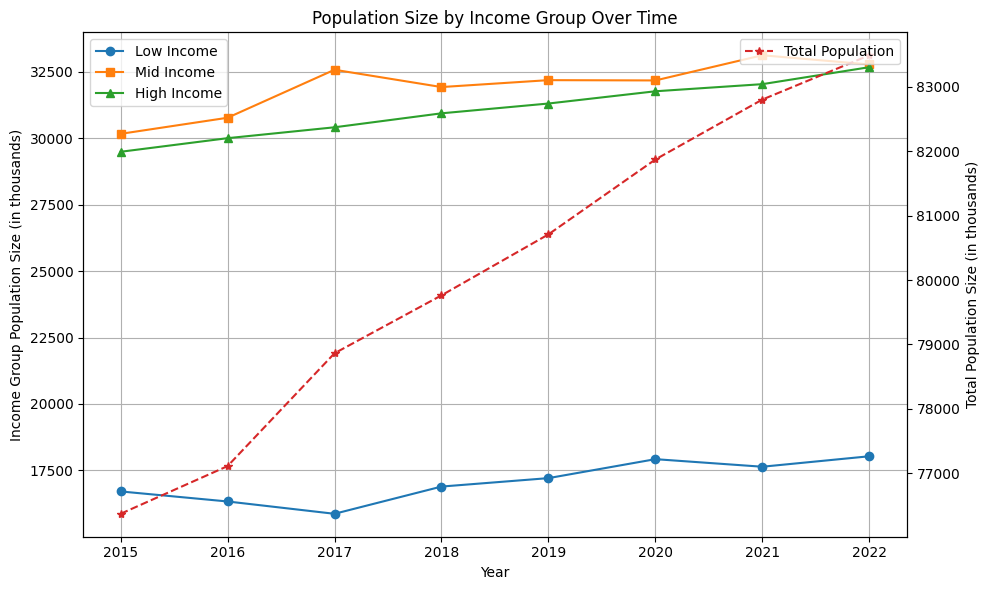

In [33]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Plot the population sizes for low, mid, and high-income groups
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df.index, df['population_low'], label='Low Income', marker='o', color='tab:blue')
ax1.plot(df.index, df['population_mid'], label='Mid Income', marker='s', color='tab:orange')
ax1.plot(df.index, df['population_high'], label='High Income', marker='^', color='tab:green')

ax1.set_title('Population Size by Income Group Over Time')
ax1.set_xlabel('Year')
ax1.set_ylabel('Income Group Population Size (in thousands)')
ax1.legend(loc='upper left')
ax1.grid(True)

# Add a second y-axis for the total population
ax2 = ax1.twinx()
ax2.plot(df.index, df['population_total'], label='Total Population', marker='*', color='tab:red', linestyle='--')
ax2.set_ylabel('Total Population Size (in thousands)')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


High-Income Group: The steady increase against the backdrop of rising total population suggests that a proportionate or potentially larger share of the new population is entering the high-income bracket. This could imply not just overall wealth expansion but also upward economic mobility or widening income disparities.

Mid-Income Group: The fluctuations against a generally increasing total population highlight the vulnerability of the middle class to economic shifts. These fluctuations in proportion to total population growth may reflect transitions between income classes or changes in median income levels.

Low-Income Group: The significant growth post-2017 in the low-income population, even as the total population continues to rise, points to a relative increase in the proportion of the population falling into this income bracket, suggesting growing economic challenges for those at the lower end of the income scale.